<h1>Выбор локации для скважины<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Условия-задачи" data-toc-modified-id="Условия-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Условия задачи</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследование-распределений-данных" data-toc-modified-id="Исследование-распределений-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование распределений данных</a></span></li><li><span><a href="#Разбиение-данных" data-toc-modified-id="Разбиение-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Разбиение данных</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Регион-0" data-toc-modified-id="Регион-0-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Регион 0</a></span></li><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Регион 2</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание данных

Данные геологоразведки трёх регионов находятся в файлах.

* **id** — уникальный идентификатор скважины;
* **f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);
* **product** — объём запасов в скважине (тыс. баррелей).

## Условия задачи

* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

### Загрузка данных

In [2]:
# функция загрузки данных
# на вход: путь к данным
def load_df(data):
    df = pd.read_csv(data)
    display(df.head())
    display(df.info())
    display(df.describe())
    print("Количество дубликатов:", df.duplicated().sum())
    return df

In [3]:
df0 = load_df('/datasets/geo_data_0.csv')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Количество дубликатов: 0


In [4]:
df1 = load_df('/datasets/geo_data_1.csv')

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Количество дубликатов: 0


In [5]:
df2 = load_df('/datasets/geo_data_2.csv')

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Количество дубликатов: 0


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

Дубликаты отсутствуют, пропусков нет, типы данных верные.

### Исследование распределений данных

In [6]:
col = ['f0','f1','f2','product']

In [7]:
# функция вывода гистограмм и диаграмм размаха
# на вход: датафрейм, нужные столбцы, номер региона
def charts(df, col, n_reg):
    for i in col:
        ax=sns.histplot(df[i],kde=True, bins=50,)
        ax.set_title(f'Гистограмма по {i} региона {n_reg}', fontdict = {'fontsize': 16})
        ax.set(xlabel=i, ylabel='Количество')
        plt.grid()
        plt.show()
    for i in col:
        df.boxplot(column=i,figsize=(14,1), grid=True, vert=False)
        plt.title(f'Диаграмма размаха по {i} региона {n_reg}', fontsize=16)
        plt.show()

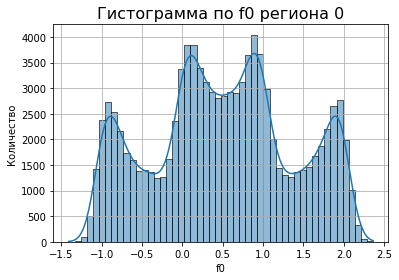

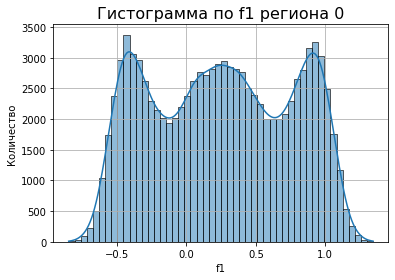

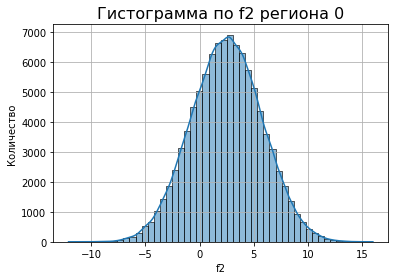

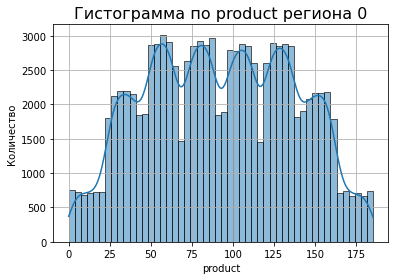

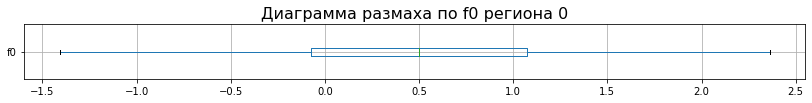

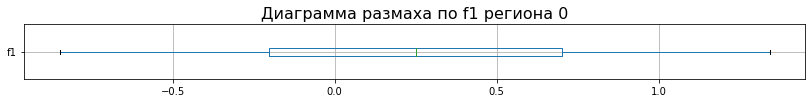

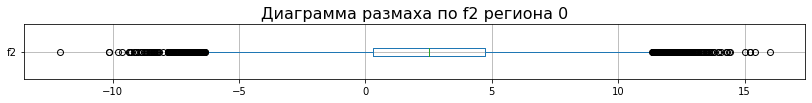

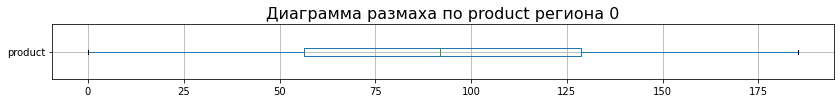

In [8]:
charts(df0, col, '0')

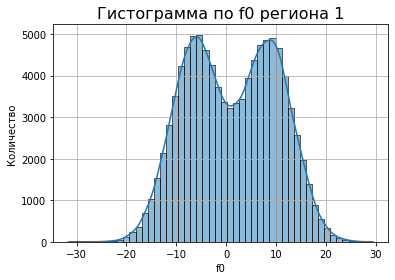

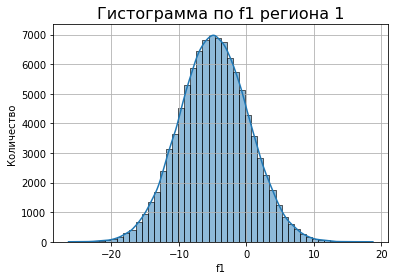

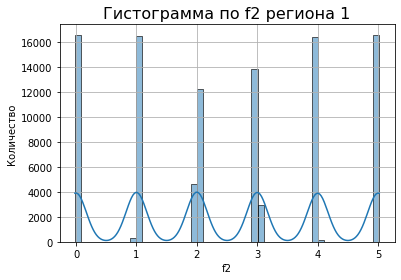

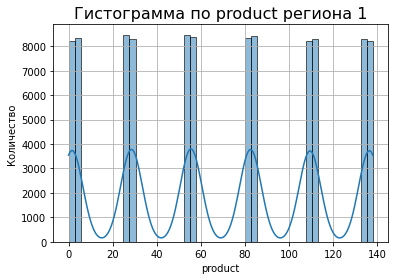

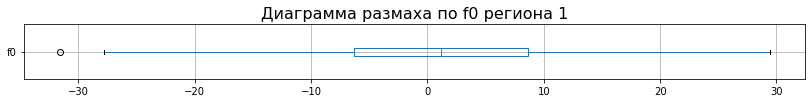

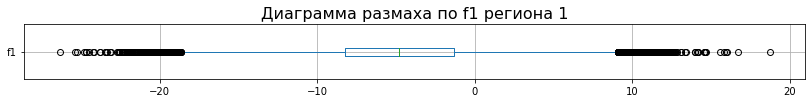

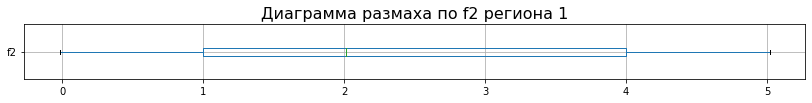

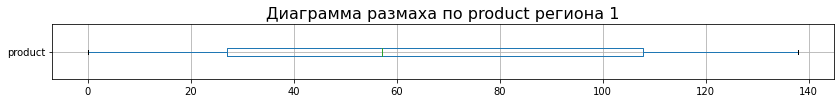

In [9]:
charts(df1, col, '1')

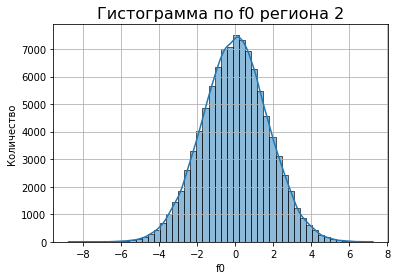

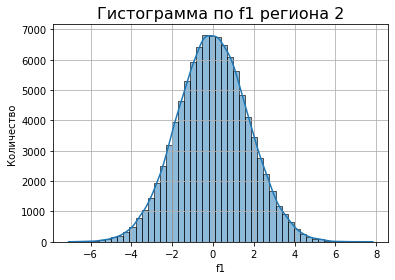

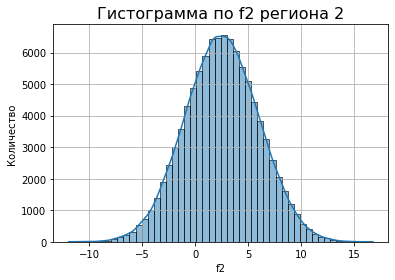

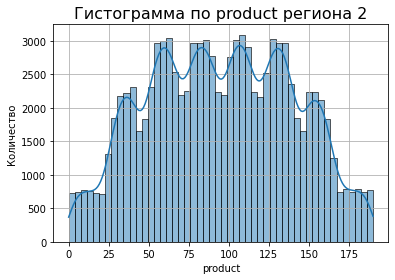

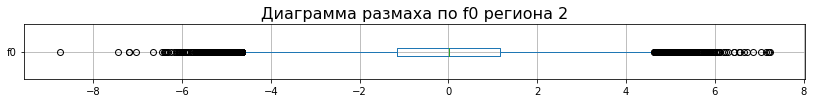

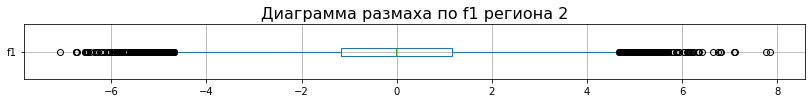

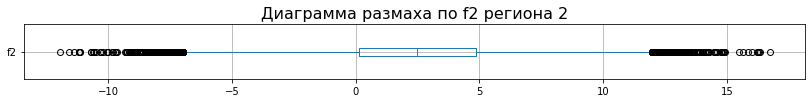

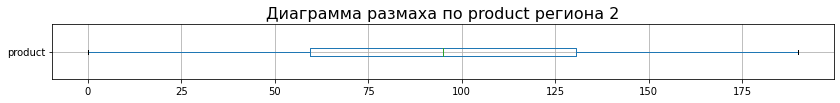

In [10]:
charts(df2, col, '2')

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">
    
* Распределения некоторых признаков отличаются от нормального. Присутствуют небольшие выбросы.
* Масштабы признаков f0, f1, f2 не сильно отличаются друг от друга (меньше одного порядка). Нет необходимости применять масштабирование.

### Разбиение данных

In [11]:
fearures = ['f0','f1','f2']
target = ['product']
# признаки и целевые для региона 0
x_0 = df0[fearures]
y_0 = df0[target]
# признаки и целевые для региона 1
x_1 = df1[fearures]
y_1 = df1[target]
# признаки и целевые для региона 2
x_2 = df2[fearures]
y_2 = df2[target]

<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу**:

* Данные загружены, проверены на дубликаты, пропуски и типы данных. Всё в порядке.
* Изучены распределения данных. Некоторые не соответствую нормальному распределению. Присутствуют небольшие выбросы.
* Созданы переменные с признаками и целевыми признаками.

## Обучение и проверка модели

In [12]:
# функция для обучения модели линеийной регрессии
# на вход: признаки и целевые признаки региона
# на выход: предсказания на валидационной выборке и правильные ответы
def lin_reg(x, y):
    # разделяем на выборки
    x_train, x_val, y_train, y_val = train_test_split(x,y, random_state=42, test_size=0.25)
    print(x_train.shape)
    print(x_val.shape)
    print(y_train.shape)
    print(y_val.shape)
    # обучаем модель
    model = LinearRegression()
    model.fit(x_train,y_train)
    # делаем предсказания, считаем среднее  и RMSE
    predictions = model.predict(x_val)
    predictions_mean = predictions.mean()
    rmse = (mean_squared_error(predictions,y_val)) ** 0.5
    
    print()
    print(f'Средний запас предсказанного сырья: {predictions_mean:.3f}')
    print(f'RMSE модели: {rmse:.3f}')
    
    return predictions, y_val

### Регион 0

In [13]:
predictions_0, y_val_0 = lin_reg(x_0, y_0)

(75000, 3)
(25000, 3)
(75000, 1)
(25000, 1)

Средний запас предсказанного сырья: 92.399
RMSE модели: 37.757


### Регион 1

In [14]:
predictions_1, y_val_1 = lin_reg(x_1, y_1)

(75000, 3)
(25000, 3)
(75000, 1)
(25000, 1)

Средний запас предсказанного сырья: 68.713
RMSE модели: 0.890


### Регион 2

In [15]:
predictions_2, y_val_2 = lin_reg(x_2, y_2)

(75000, 3)
(25000, 3)
(75000, 1)
(25000, 1)

Средний запас предсказанного сырья: 94.771
RMSE модели: 40.146


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу:**

В регионах 0 и 2 достаточно высокие средние показатели предсказанного сырья (92.399 и 94.771 соответственно). При этом у них очень высокая RMSE (37.757 и 40.146). Это говорит нам о неточности модели линейной регрессии.

В регионе 1 средний показатель предсказанного сырья 68.713, что меньше чем, у регионов 0 и 2. Но при этом маленькая RMSE (0.890). В данном случае модель вышла качественной.

## Подготовка к расчёту прибыли

In [16]:
# объявляем константы
BUDGET = 10e9
POINTS = 500
TOP_POINTS = 200
REVENUE_PER_UNIT = 450e3

In [17]:
product_min = BUDGET / (TOP_POINTS * REVENUE_PER_UNIT)
print(f'Минимальный объём сырья для безубыточной разработки новой скважины: {product_min:.3f}')

Минимальный объём сырья для безубыточной разработки новой скважины: 111.111


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу:**

Минимальный средний объём сырья для безубыточной разработки новой скважины составляет 111.111 тыс. баррелей. Это значение рассчитано на 200 скважин.

Данное значение превышает средние значения запасов по всем регионам.

## Расчёт прибыли и рисков 

In [18]:
# делаем из датафрейма серию
y_val_0 = pd.Series(y_val_0['product']).reset_index(drop=True)
y_val_1 = pd.Series(y_val_1['product']).reset_index(drop=True)
y_val_2 = pd.Series(y_val_2['product']).reset_index(drop=True)
# делаем из массива серию
predictions_0 = pd.Series(predictions_0.reshape(len(predictions_0),))
predictions_1 = pd.Series(predictions_1.reshape(len(predictions_1)))
predictions_2 = pd.Series(predictions_2.reshape(len(predictions_2)))

In [19]:
state = np.random.RandomState(42)

In [20]:
# функция для нахождения прибыли с 200 лучших из 500 случайных скважин
# на вход: валидационная выборка, предсказания для региона
# на выход: чистая прибыль
def income(y_val, pred):
    
    # создаем серию из 500 случайных скважин, после сортируем и отбираем 200 лучших
    sample_pred = pred.sample(n=POINTS, random_state=state)
    top_sample_pred = sample_pred.sort_values(ascending=False)[:TOP_POINTS]
    top_sample_val = y_val[top_sample_pred.index]
    
    # находим общую сумму добычи и прибыль
    sum_top_sample_val = top_sample_val.sum()
    total_income = sum_top_sample_val * REVENUE_PER_UNIT - BUDGET
    
    return total_income

In [21]:
# функция расчета средней прибыли, 95-% доверительного интервала, вероятности убытков
# на вход: валидационная выборка, предсказания для региона, номер региона
def risks(y_val, pred, reg):
    print(f'Регион {reg}')
    print('='*10)
    
    # создаем список из 1000 вариантов прибыли
    values_income = []
    for i in range(1000):
        values_income.append(income(y_val, pred))
        
    # переводим список в серию и считаем среднюю прибыль    
    values_income = pd.Series(values_income)
    income_mean = values_income.mean()
    print(f'Средняя прибыль: {income_mean:.3f}')
    
    # находим доверительный интервал через квантили
    alpha = 0.05
    low_q = values_income.quantile(alpha/2)
    high_q = values_income.quantile(1-alpha/2)
    print(f'95-% доверительный интервал: ({low_q}; {high_q})')
    
    # ведем подсчет сколько раз попадается убытки и высчитываем их % от общего количества
    losses = (values_income < 0).mean()
    
    print(f'Вероятность убытков: {losses:.2%}')

In [22]:
risks(y_val_0, predictions_0, 0)

Регион 0
Средняя прибыль: 408515053.884
95-% доверительный интервал: (-138678493.88196224; 952414908.4140642)
Вероятность убытков: 7.40%


In [23]:
risks(y_val_1, predictions_1, 1)

Регион 1
Средняя прибыль: 436119513.637
95-% доверительный интервал: (28878732.655240346; 865831912.5385565)
Вероятность убытков: 1.70%


In [24]:
risks(y_val_2, predictions_2, 2)

Регион 2
Средняя прибыль: 385037868.036
95-% доверительный интервал: (-185862734.65718856; 885439396.229598)
Вероятность убытков: 8.60%


<div style="background-color:black; color:#ffffff; text-align:left; padding:2%">

**Вывод по разделу:**

При оценке 200 лучших из 500 случайных скважин в каждом регионе получены следующие результаты:
    
* Максимальная возможная средняя прибыль у региона 1.
* Только у региона 1 95-% доверительный интервал полностью находится в положительной зоне.
* У региона 1 единственного вероятность убытков меньше 2,5%.
* Рекомендуется к разработке регион 1.

## Общий вывод

В регионах 0 и 2 достаточно высокие средние показатели предсказанного сырья (92.399 и 94.771 соответственно). При этом у них очень высокая RMSE (37.757 и 40.146). Это говорит нам о неточности модели линейной регрессии.

В регионе 1 средний показатель предсказанного сырья 68.713, что меньше чем, у регионов 0 и 2. Но при этом маленькая RMSE (0.890). В данном случае модель вышла качественной.

Минимальный средний объём сырья для безубыточной разработки новой скважины составляет 111.111 тыс. баррелей. Это значение рассчитано на 200 скважин.

При оценке 200 лучших из 500 случайных скважин в каждом регионе получены следующие результаты:
    
* Максимальная возможная средняя прибыль у региона 1.
* Только у региона 1 95-% доверительный интервал полностью находится в положительной зоне.
* У региона 1 единственного вероятность убытков меньше 2,5%.

**Рекомендуется к разработке регион 1.**